In [1]:
# This notebook illustrates the halfar ice model

# Import funman related code
import os
from pathlib import Path
from funman import FunmanResults
import json
from funman import Point, Box, Parameter
from typing import List, Dict
from funman.api.run import Runner

RESOURCES = os.path.join(
   os.getcwd(), "../../resources"
)
EXAMPLE_DIR = os.path.join(RESOURCES, "amr", "halfar")
MODEL_PATH = os.path.join(EXAMPLE_DIR, "halfar.json")
REQUEST_PATH = os.path.join(EXAMPLE_DIR, "halfar_request.json")


def summarize_results(variables, results):
   points = results.points()
   boxes = results.parameter_space.boxes()

   print(
      f"{len(points)} Points (+:{len(results.parameter_space.true_points())}, -:{len(results.parameter_space.false_points())}), {len(boxes)} Boxes (+:{len(results.parameter_space.true_boxes)}, -:{len(results.parameter_space.false_boxes)})"
   )
   if points and len(points) > 0:
      point: Point = points[-1]
      parameters: Dict[Parameter, float] = results.point_parameters(point)
      results.plot(variables=variables, label_marker={"true":",", "false": ","},  xlabel="Time", ylabel="Height", legend=variables,label_color={"true": "g", "false":"r"})
      parameter_values = { p:point.values[p.name] for p in parameters}
      print(f"Parameters = {parameter_values}")
      print(parameters)
      print(results.dataframe([point]))
   else:
      # if there are no points, then we have a box that we found without needing points
      box = boxes[0]
      print(json.dumps(box.explain(), indent=4))


# %load_ext autoreload
# %autoreload 2

In [ ]:
# Use a five point model with no constraints

num_disc = 5

MODEL_PATH = os.path.join("../resources/amr/halfar/hand_generated", f"halfar_{num_disc}.json")

variables = [f"h_{d}" for d in range(num_disc)]
height_bounds = [
            {"name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0, "ub": 1.01}
         }
    for i in variables
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0,10, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "A",
         "label":"all",
         "interval": {"lb":1e-20, "ub":1e-12}}
        # "interval": {"lb":0, "ub":1}}
    ],
    "constraints": height_bounds + 
    [
        {"name": "LHS_slope",
            "variables": ["h_1", "h_0"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }, 
        {"name": "RHS_slope",
            "variables": ["h_3", "h_4"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            "timepoints": {"lb": 0}
        }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        # "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        # "tolerance": 1e-3,
        "verbosity": 20,
        # "dreal_mcts": False,
        # "dreal_precision": 0.1,
        # "save_smtlib": "./out",
        # "substitute_subformulas": False,
        # "series_approximation_threshold": None,
        # "dreal_log_level": "info",
        # "profile": False,
    },
}


# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["A", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=None,
    
)

summarize_results(variables, results)




2023-12-08 15:51:09,841 - funman.server.worker - INFO - FunmanWorker running...
2023-12-08 15:51:09,845 - funman.server.worker - INFO - Starting work on: c8080d76-e8d8-497d-86ea-8212370f558d
2023-12-08 15:51:11,854 - funman.api.run - INFO - Dumping results to ./out/c8080d76-e8d8-497d-86ea-8212370f558d.json
2023-12-08 15:51:17,101 - funman.scenario.consistency - INFO - 9{9}:	[+]
2023-12-08 15:51:17,102 - funman.server.worker - INFO - Completed work on: c8080d76-e8d8-497d-86ea-8212370f558d
2023-12-08 15:51:21,890 - funman.api.run - INFO - Creating plot of point trajectories: ./out/c8080d76-e8d8-497d-86ea-8212370f558d_points.png


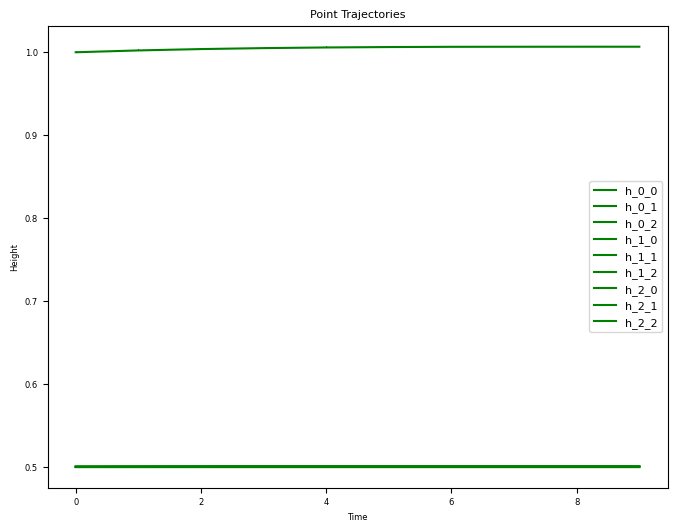

2023-12-08 15:51:22,288 - funman.api.run - INFO - Creating plot of parameter space: ./out/c8080d76-e8d8-497d-86ea-8212370f558d_parameter_space.png


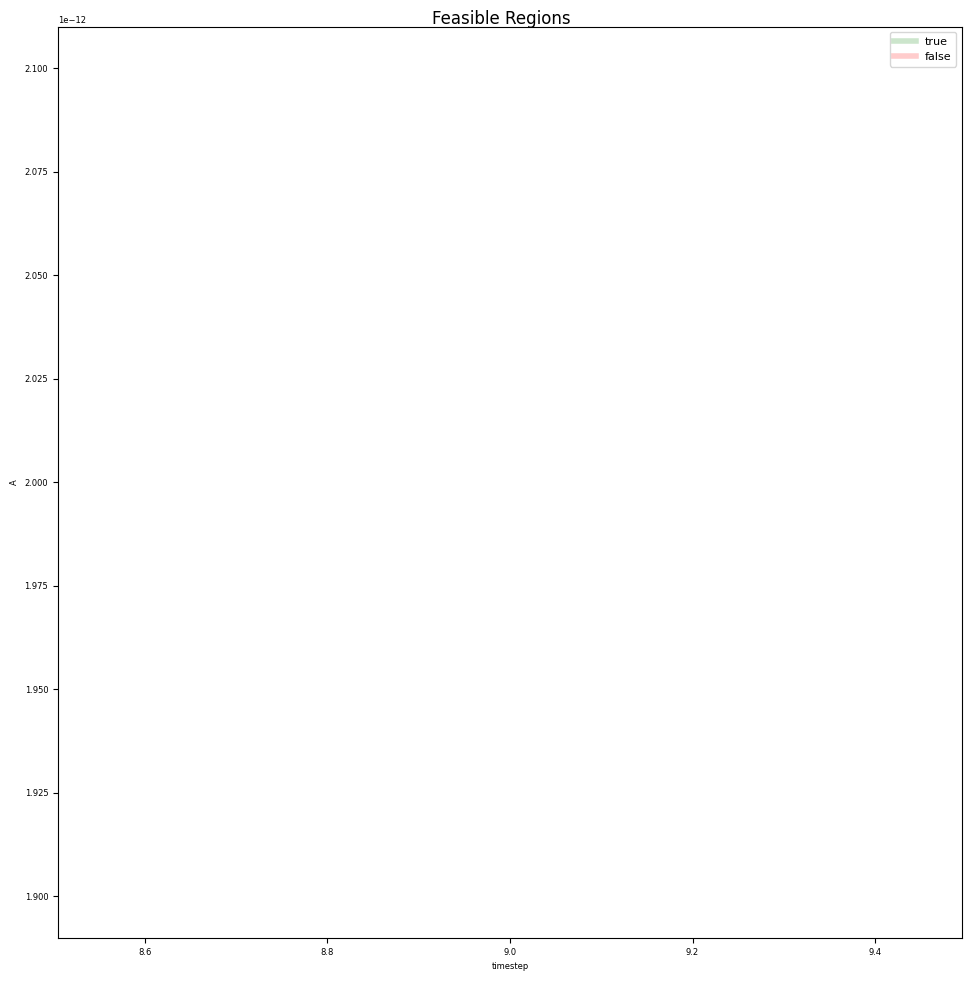

2023-12-08 15:51:22,576 - funman.server.worker - INFO - Worker.stop() acquiring state lock ....
2023-12-08 15:51:22,632 - funman.server.worker - INFO - FunmanWorker exiting...
2023-12-08 15:51:22,633 - funman.server.worker - INFO - Worker.stop() completed.


1 Points (+:1, -:0), 1 Boxes (+:1, -:0)
Parameters = {A[1.0000000000000002e-12, 3e-12): 2e-12}
{A[1.0000000000000002e-12, 3e-12): 2e-12}
                 A  h_0_0     h_0_1  h_0_2     h_1_0     h_1_1     h_1_2  \
time                                                                       
0.0   2.000000e-12    0.5  0.500000    0.5  0.500000  1.000000  0.500000   
1.0   2.000000e-12    0.5  0.500139    0.5  0.500139  1.002216  0.500139   
2.0   2.000000e-12    0.5  0.500210    0.5  0.500210  1.003850  0.500210   
3.0   2.000000e-12    0.5  0.500240    0.5  0.500240  1.005008  0.500240   
4.0   2.000000e-12    0.5  0.500248    0.5  0.500248  1.005792  0.500248   
5.0   2.000000e-12    0.5  0.500250    0.5  0.500250  1.006290  0.500250   
6.0   2.000000e-12    0.5  0.500250    0.5  0.500250  1.006574  0.500250   
7.0   2.000000e-12    0.5  0.500248    0.5  0.500248  1.006647  0.500248   
8.0   2.000000e-12    0.5  0.500240    0.5  0.500240  1.006678  0.500240   
9.0   2.000000e-12    0.5  

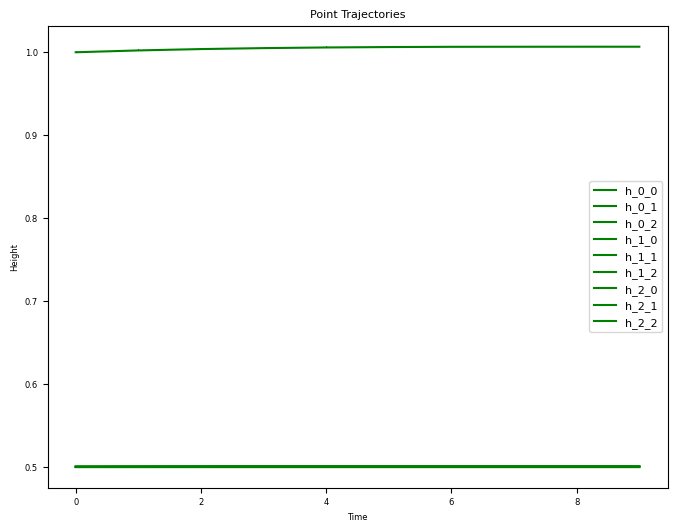

In [16]:
# Use a five point 2d model 

num_disc = 3

MODEL_PATH = os.path.join("../", f"halfar.json")

variables = [f"h_{d1}_{d2}" for d1 in range(num_disc) for d2 in range(num_disc)]
height_bounds = [
            {"name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0, "ub": 1.01}
         }
    for i in variables
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0,10, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "A",
         "label":"any",
        #  "interval": {"lb":1e-20, "ub":1e-12}}
         "interval": {"lb":1e-12, "ub":3e-12}}
        # "interval": {"lb":0, "ub":1}}
    ],
    "constraints": height_bounds + 
    [
        # {"name": "LHS_slope",
        #     "variables": ["h_1", "h_0"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }, 
        # {"name": "RHS_slope",
        #     "variables": ["h_3", "h_4"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        # "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        # "tolerance": 1e-3,
        "verbosity": 20,
        # "dreal_mcts": False,
        "dreal_precision": 1,
        "save_smtlib": "./out",
        # "substitute_subformulas": False,
        # "series_approximation_threshold": None,
        # "dreal_log_level": "info",
        # "profile": False,
    },
}


# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["A", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables,"label_color":{"true": "g", "false":"r"}},
    num_points=None,
    
)

summarize_results(variables, results)




In [12]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
import numpy as np
import pandas as pd
from sklearn import preprocessing

df = results.dataframe(points=[results.parameter_space.true_points()[-1]])
steps=len(df)
df = df.drop(columns=["A", "id", "label"])


# x = df.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# standard_scaler = preprocessing.StandardScaler()
# # x_scaled = min_max_scaler.fit_transform(x)
# x_scaled = standard_scaler.fit_transform(x)
# df = pd.DataFrame(x_scaled, columns =df.columns)



df.columns = df.columns.str.split("_", expand=True)
df = df.stack([1])



def animate_heat_map(my_df, frames):
    fig = plt.figure()

    data = my_df.loc[0,:]
    vmin = my_df.min().min()
    vmax = my_df.max().max()
    # ax = sns.heatmap(data, vmin=0, vmax=1)

    # def init():
    #     plt.clf()
    #     ax = sns.heatmap(data, vmin=0, vmax=1)

    def animate(i):
        plt.clf()
        data = my_df.loc[i,:]
        ax = sns.heatmap(data, vmin=vmin, vmax=vmax, cmap="crest")

    anim = animation.FuncAnimation(fig, animate, #init_func=init, 
    interval=1000, frames=frames)

    return anim
    


# anim = animate_heat_map(df, steps)
# HTML(anim.to_jshtml())

df

IndexError: list index out of range

In [ ]:
# Advection Model

num_disc = 5

# MODEL_PATH = os.path.join("..", f"resources/amr/advection_1d/advection_1d_forward.json")
MODEL_PATH = os.path.join("..", f"resources/amr/advection_1d/advection_1d_backward.json")
# MODEL_PATH = os.path.join("..", f"resources/amr/advection_1d/advection_1d_centered.json")

height_bounds = [
            {"name": f"pos_u_{i}",
         "variable": f"u_{i}",
         "interval": {"lb": 0}
         }
    for i in range(num_disc)
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0, 3, 1)}
            ],
        },
        
    ],
    "parameters":[
        {"name": "dx",
         "label":"all",
        #  "interval": {"lb":1e-18, "ub":1e-14}}
        "interval": {"lb":1e-10, "ub":1}},
        {"name": "a",
         "label":"all",
        #  "interval": {"lb":1e-18, "ub":1e-14}}
        "interval": {"lb":1e-10, "ub":1}}
    ],
    "constraints": 
    height_bounds + 
    [

        {"name": "dx_gte_a",
            "variables": ["dx", "a"],
            "weights": [1, -1],
            "additive_bounds": {"lb": 0},
            # "timepoints": {"lb": 0}
        }, 
    #     {"name": "RHS_slope",
    #         "variables": ["h_8", "h_9"],
    #         "weights": [1, -1],
    #         "additive_bounds": {"lb": 0},
    #         "timepoints": {"lb": 0}
    #     }


    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "use_compartmental_constraints": False,
        "normalization_constant": 1.0,
        "tolerance": 1e-5,
        "verbosity": 20,
        "dreal_mcts": True,
        # "dreal_precision": 1,
        "save_smtlib": "./out",
        "substitute_subformulas": False,
        "series_approximation_threshold": None,
        "dreal_log_level": "none",
        "profile": False,
    },
}
variables = [f"u_{d}" for d in range(num_disc)]

# Use request_dict
results = Runner().run(
    MODEL_PATH,
    request_dict,
    # REQUEST_PATH,
    description="Halfar demo",
    case_out_dir="./out",
    dump_plot=True,
    parameters_to_plot=["a", "dx", "timestep"],
    point_plot_config={"variables":variables, "label_marker":{"true":",", "false": ","},  "xlabel":"Time", "ylabel":"Height", "legend":variables
    #,"label_color":{"true": "g", "false":"r"}
    },
    num_points=None
)

summarize_results(variables, results)




(solve_step_0 and disj13 and b((a < 1)) and b((dx < 1)) and solve_step_1 and disj27 and disj28 and (conj1 or !(solve_step_0) or !(disj13)) and (b((u_4_0 < 0)) or b((u_3_0 < 0)) or b((a < 1e-10)) or b((dx < 1e-10)) or !(b((u_4_0 == 0.10000000000000001))) or !(b((u_3_0 == 0.5))) or !(b((a < 1))) or !(b((dx < 1))) or !(b((u_4_1 == 0))) or !(b((u_4_1 == (u_4_0 + (u_3_0 * a * pow(dx, -1))))))) and (b((u_4_0 == 0.10000000000000001)) or !(conj1)) and (b((u_3_0 == 0.5)) or !(conj1)) and (solve_step_2 or conj10 or !(disj28)) and (conj6 or !(solve_step_1) or !(disj27)) and (b((u_4_1 == 0)) or !(conj10)) and (b((u_4_1 == (u_4_0 + (u_3_0 * a * pow(dx, -1))))) or !(conj6)) and (!(b((u_4_0 < 0))) or !(b((u_4_0 == 0.10000000000000001)))) and (!(b((u_3_0 < 0))) or !(b((u_3_0 == 0.5)))) and !(b((a < 1e-10))) and !(b((dx < 1e-10))) and !(solve_step_2))


In [ ]:
# Centered

#         a   dx  id label      u_0       u_1       u_2        u_3       u_4
# time                                                                      
# 0.0   0.5  0.1   0  true   0.1000    0.5000   1.00000    0.50000   0.10000
# 1.0   0.5  0.1   0  true  -1.1500   -1.7500   1.00000    3.00000   1.35000
# 2.0   0.5  0.1   0  true   3.2250   -7.1250 -10.87500    5.50000   8.85000
# 3.0   0.5  0.1   0  true  21.0375   28.1250 -42.43750  -21.68750  22.60000
# 4.0   0.5  0.1   0  true -49.2750  186.8125  82.09375 -127.78125 -31.61875

# Forward 

#         a   dx  id label     u_0     u_1    u_2    u_3    u_4
# time                                                         
# 0.0   0.5  0.1   0  true     0.1     0.5    1.0    0.5    0.1
# 1.0   0.5  0.1   0  true    -1.9    -2.0    3.5    2.5    0.6
# 2.0   0.5  0.1   0  true    -1.4   -29.5    8.5   12.0    3.6
# 3.0   0.5  0.1   0  true   139.1  -219.5   -9.0   54.0   21.6
# 4.0   0.5  0.1   0  true  1932.1 -1272.0 -324.0  216.0  129.6


# Backward 

#         a   dx  id label   u_0           u_1    u_2    u_3    u_4
# time                                                             
# 0.0   0.5  0.1   0  true   0.1  5.000000e-01    1.0    0.5    0.1
# 1.0   0.5  0.1   0  true  -0.4 -1.500000e+00   -1.5    3.0    2.6
# 2.0   0.5  0.1   0  true   1.6  4.000000e+00   -1.5  -19.5   17.6
# 3.0   0.5  0.1   0  true  -6.4 -8.000000e+00   26.0   70.5  -79.9
# 4.0   0.5  0.1   0  true  25.6 -1.243450e-14 -144.0 -152.0  272.6